## Final Project Submission

Please fill out:
* Student name: Annah Mukethe
* Student pace: Part Time
* Instructor name: Samuel Mwangi


## PROJECT DESCRIPTION ##

**OVERVIEW**

In this project, we aim to assist Microsoft in entering the movie industry by leveraging exploratory data analysis (EDA) to uncover trends and patterns in box office performance. By examining a comprehensive dataset of films, we will identify the characteristics of successful movies, providing actionable insights to guide Microsoft's new movie studio in producing content that resonates with audiences and performs well financially.

## BUSINESS UNDERSTANDING ##

**BUSINESS PROBLEM**

Microsoft, inspired by the success of major companies producing original video content, has decided to launch its own movie studio. However, with no prior experience in film production, Microsoft faces a significant challenge in understanding the dynamics of the movie industry. The goal is to explore the current film landscape, specifically focusing on what types of films are achieving the best box office results. By identifying key factors that contribute to a movie's success, Microsoft can make informed decisions about the types of films to produce, ensuring a competitive entry into the market.

**OBJECTIVES**

1. **Analyze Market Trends:** Identify the genres, themes, and characteristics of movies that are currently performing well.

2. **Determine Key Success Factors:** Understand the elements that contribute to high performance, such as budget, runtime, release period, and critical reception.
3. **Provide Actionable Insights:** Translate the findings into strategic recommendations for the types of films Microsoft should create to maximize their chances of success in the competitive movie industry.

## DATA UNDERSTANDING ##

**DATA SOURCE**

Data Source: IMDb (Internet Movie Database) dataset
Justification: IMDb is a comprehensive and reliable source for movie data, including ratings, genres, and other relevant information.

**DATASET COLUMN DESCRIPTION**

The Description is based on the columns resulted from merging two tables from the im.db.


**movie_id:** Unique identifier for each movie.

**primary_title:** The main title of the movie.

**original_title:** The original title of the movie in its native language.

**start_year:** The year the movie was released.

**runtime_minutes:** The duration of the movie in minutes.

**genres:** The categories or genres the movie belongs to (e.g., Drama, Comedy).

**averagerating:** The average rating given to the movie by viewers.

**numvotes:** The number of votes the movie has received from viewers.

**IMPORTING LIBRARIES**

In [27]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 

**DATABASE CONNECTION**

In [2]:
conn = sqlite3.Connection("im.db")
cursor = conn.cursor()

**SCHEMA INSPECTION**

In [3]:
#checking the tables that are available in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

for table in tables:
    print(f"\nTable: {table[0]}")
    cursor.execute(f"PRAGMA table_info({table[0]});")
    columns = cursor.fetchall()
    print("Columns:")
    for column in columns:
        print(f" - {column[1]} (Type: {column[2]})")


Table: movie_basics
Columns:
 - movie_id (Type: TEXT)
 - primary_title (Type: TEXT)
 - original_title (Type: TEXT)
 - start_year (Type: INTEGER)
 - runtime_minutes (Type: REAL)
 - genres (Type: TEXT)

Table: directors
Columns:
 - movie_id (Type: TEXT)
 - person_id (Type: TEXT)

Table: known_for
Columns:
 - person_id (Type: TEXT)
 - movie_id (Type: TEXT)

Table: movie_akas
Columns:
 - movie_id (Type: TEXT)
 - ordering (Type: INTEGER)
 - title (Type: TEXT)
 - region (Type: TEXT)
 - language (Type: TEXT)
 - types (Type: TEXT)
 - attributes (Type: TEXT)
 - is_original_title (Type: REAL)

Table: movie_ratings
Columns:
 - movie_id (Type: TEXT)
 - averagerating (Type: REAL)
 - numvotes (Type: INTEGER)

Table: persons
Columns:
 - person_id (Type: TEXT)
 - primary_name (Type: TEXT)
 - birth_year (Type: REAL)
 - death_year (Type: REAL)
 - primary_profession (Type: TEXT)

Table: principals
Columns:
 - movie_id (Type: TEXT)
 - ordering (Type: INTEGER)
 - person_id (Type: TEXT)
 - category (Type: 

From output above, it is evident that the database contains 8 tables that is : movie_basics, directors, known_for, movie_akas, movie_ratings,
persons, principals and writers. We will inspect each table to understand the nature of the data they hold and also to determine which tables we will need for our analysis.

**TABLE INSPECTION AND UNDERSTANDING RELATIONS**

In [4]:
#We use a function to query all the tables first rows. By inspecting these rows we get to better understand our data
def inspect_table(table_name, conn, limit=5):
    query = f"SELECT * FROM {table_name} LIMIT {limit};"
    return pd.read_sql_query(query, conn)

In [5]:
#Calling the function
tables = ["movie_basics", "directors", "known_for", "movie_akas", "movie_ratings", "persons", "principals", "writers"]

for table in tables:
    print(f"Inspecting {table}")
    display(inspect_table(table, conn))

Inspecting movie_basics


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Inspecting directors


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


Inspecting known_for


,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


Inspecting movie_akas


,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


Inspecting movie_ratings


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Inspecting persons


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,None,None,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,None,None,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,None,None,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,None,None,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,None,None,"production_designer,art_department,set_decorator"


Inspecting principals


,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


Inspecting writers


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


# Rationale for selecting the movie_basics and movie_ratings tables:

After inspecting the available tables in the database, we determined that the movie_basics and movie_ratings tables would be the most relevant for our analysis.
The movie_basics table contains essential information about each movie, such as its unique identifier, title, release year, runtime, and genres. This information is crucial for understanding and categorizing the movies in our analysis.

The movie_ratings table provides valuable insights into the popularity and reception of each movie by including the average rating and the number of votes cast. This information can be used to analyze the critical and audience reception of movies, identify well-received or poorly received titles, and potentially uncover patterns or correlations between movie attributes and their ratings.

While the other tables in the database, such as directors, writers, and principals, contain additional details about the people involved in the movies, we decided to focus our analysis on the movie-level data first. Incorporating information from these additional tables could be explored in future analyses if deemed necessary.

By focusing on the movie_basics and movie_ratings tables, we can effectively analyze the core attributes and reception of the movies without overwhelming our initial analysis with excessive complexity from the additional tables.

**JOINING THE TABLES**

We will join the two tables using inner join so as to have one complete dataset.

In [6]:
#Joining the two tables using inner join on movie_id
movie_df = """ 
            SELECT a.movie_id, a.primary_title, a.original_title, a.start_year, a.runtime_minutes, a.genres,
            b.averagerating, b.numvotes FROM movie_basics a inner join movie_ratings b on b.movie_id = a.movie_id;
                
            """
pd.read_sql_query(movie_df, conn)    

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


**LOADING THE DATA AS A PANDAS DATAFRAME**

In [7]:
# Load the table into pandas DataFrames and closing the database connection.
df = pd.read_sql_query(movie_df, conn) 
conn.close()

## DATA UNDERSTANDING ##

**METHODOLOGY**
1. Checking the shape/size of the dataset
2. Checking for duplicates
3. Checking for missing values
4. Checking for outliers


In [8]:
#Inspecting the shape of the df
print('Shape of the movies dataset is:', df.shape)

Shape of the movies dataset is: (73856, 8)


From the shape above, we see that we have 73,856 rows and 8 columns.

In [9]:
#Inspecting the first few 5 rows.
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [10]:
#Inspecting the last few rows
df.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5
73855,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,6.5,11


From the inspection of the first and last 5 rows, our data is well stractured in the desired tabular format. However, we can already see a column with NaN values that is the runtime_minutes column indicating presence of missing values. We will further check for missing values in all columns.

In [11]:
#Checking for missing values in our dataset
df.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [12]:
#Comouting the percentages of mikssing values
missing_percentages = df.isnull().mean() * 100
print(missing_percentages)

movie_id            0.000000
primary_title       0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes    10.317374
genres              1.088605
averagerating       0.000000
numvotes            0.000000
dtype: float64


We see that the runtime_minutes and genres both have missing values with runtime_minutes having 7,620 missing values taking about 10% of the dataset while genres has 804 of missing values constituting about 1% of the total dataset.

In [13]:
#checking for duplicates
df.duplicated().sum()

0

From the results above, it is clear we do not have any duplicated values

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


We see that majority of our columns do  ot constitute missing values. As for the data types we see that each column is of the desired data type based on the nature of values they have.

In [15]:
#checking the summary statistics of the numerical values
df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


**Analysis of movie duration, ratings, and number of votes.**

The results displayed provide summary statistics for various attributes related to the movies in our dataset.

1. count: This row shows the number of movies for which we have valid data for each attribute. For example, we have runtime_minutes data for 7,385 movies and averageRating data for 6,623 movies.

2. mean: This row displays the average or mean value for each attribute. On average, the movies in our dataset were released in 2014, have a runtime of approximately 95 minutes, an average rating of 6.33, and received around 93,523 votes.

3. std: This row shows the standard deviation, which measures the spread or dispersion of the data from the mean. For instance, the standard deviation of runtime_minutes is 208.57, indicating a relatively large variation in movie durations.

4. min: This row displays the minimum value for each attribute. The earliest release year in our dataset is 2010, the shortest movie runtime is 3 minutes, the lowest average rating is 1.0, and the movie with the fewest votes received only 5 votes.

5. 25%, 50% (median), and 75%: These rows represent the 25th, 50th (median), and 75th percentiles of the data, respectively. For example, 50% of the movies in our dataset have a runtime of 91 minutes or less, and 25% have an average rating of 5.5 or lower.

6. max: This row shows the maximum value for each attribute. The latest release year is 2019, the longest movie runtime is 51,420 minutes (approximately 35 days!), the highest average rating is 10.0, and the most popular movie received over 1.8 million votes.

These summary statistics provide valuable insights into the distribution and range of values for our key movie attributes, which can inform our subsequent analyses and help identify potential outliers or interesting patterns.

In [16]:
#Checking for outliers
import pandas as pd

def detect_outliers(df):
    outliers = {}
    
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:  # Only apply to numeric columns
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    
    return outliers

In [17]:
outliers_dict = detect_outliers(df)

# Display outliers for each column
for column, outliers in outliers_dict.items():
    print(f"Outliers in column {column}:\n{outliers}\n")

Outliers in column start_year:
Series([], Name: start_year, dtype: int64)

Outliers in column runtime_minutes:
0        175.0
9        180.0
12       160.0
20        44.0
24        45.0
         ...  
73662     45.0
73710    145.0
73721    140.0
73731    140.0
73793     16.0
Name: runtime_minutes, Length: 3588, dtype: float64

Outliers in column averagerating:
16       1.9
321      2.3
431      1.7
513      2.2
608      2.3
        ... 
73722    2.2
73729    1.4
73747    2.1
73778    2.5
73839    2.6
Name: averagerating, Length: 1172, dtype: float64

Outliers in column numvotes:
2         4517
16        8248
27        1053
31       15378
32        2328
         ...  
73388    19632
73427      817
73683     2220
73730     1214
73735      873
Name: numvotes, Length: 11758, dtype: int64



**Summary from the outliers output:**
**start_year:** 

No outliers detected.

**runtime_minutes:** 

Many outliers, indicating a wide range of runtimes, with some movies being much shorter or longer than average.

**averagerating:** 

Several outliers, showing a diverse range of ratings with some movies rated significantly lower or higher than average.

**numvotes:** 

A large number of outliers, reflecting a high variability in the number of votes movies receive.

These results indicate that while some columns (like start_year) have consistent values, others (like runtime_minutes, averagerating, and numvotes) exhibit significant variability, with many values lying outside the typical range. This variability can be important for further analysis and might suggest areas to investigate more closely, such as the factors contributing to extreme runtimes, ratings, or vote counts.

## DATA CLEANING AND PREPROCESSING ##

**METHODOLOGY**
1. Handling missing values: We can either drop of impute our null values
2. Handling outliers: We determine the size of the outliers then decide whether to drop or keep them.

**STEP 1: HANDLING MISSING VALUES**

We will address the missing values in the `runtime_minutes` column by imputing them with the mean values, rather than dropping the rows. For the missing values in the `genre` column, we will remove those rows since they account for only 1% of the dataset and, being a categorical variable, imputation is not a suitable option.

In [18]:
# Replace missing values with the median
df['runtime_minutes'] = df['runtime_minutes'].fillna(df['runtime_minutes'].mean())

In [19]:
#droping the missing values in genre column
df.dropna(subset = ['genres'], inplace = True)

In [20]:
#checking for missing values after imputing and dropping null values
df.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [21]:
print('Shape after handling missing values:',df.shape)

Shape after handling missing values: (73052, 8)


We now do not have any missing values and our data shape has reduced number of rows from the rows dropped.

**HANDLING OUTLIERS**

We will visualize the numerical columns that is the runtime_minutes, numvotes and averagerating to get a clear picture before we handle the outliers.

In [28]:
# A function to plot columns to visualize outliers
def plot_outlier_boxplots(df, columns):
    """
    Plots boxplots for specified columns to visualize outliers.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): List of column names to plot boxplots for.
    """
    for column in columns:
        if column in df.columns:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=df[column])
            plt.title(f'Boxplot of {column}')
            plt.xlabel(column)
            plt.show()
        else:
            print(f"Column '{column}' does not exist in the DataFrame")

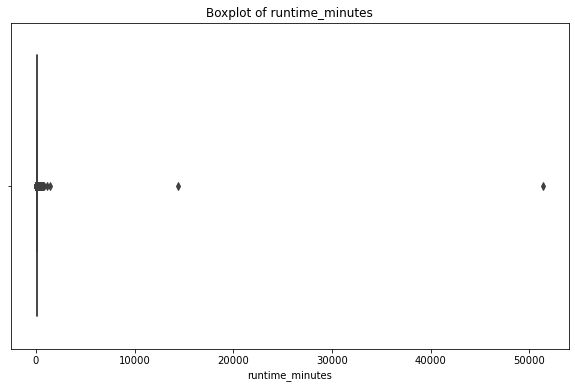

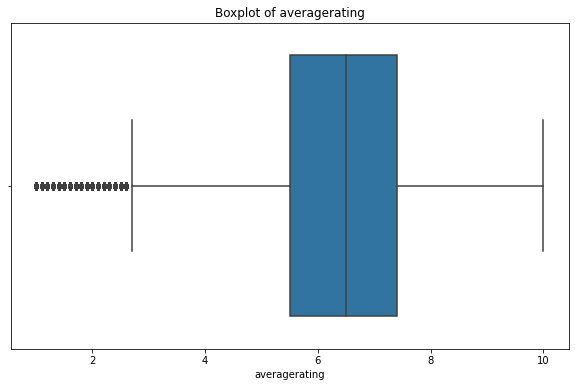

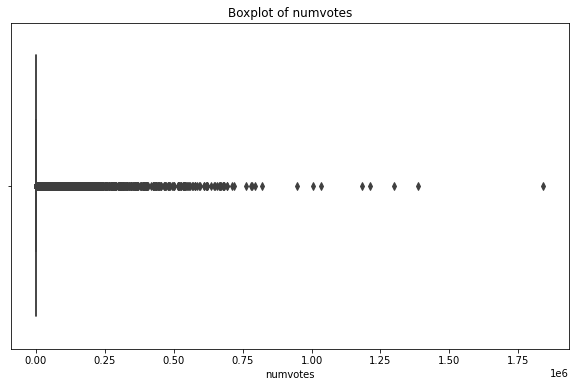

In [29]:
# calling on our function
outlier_columns = ['runtime_minutes', 'averagerating', 'numvotes']
plot_outlier_boxplots(df, outlier_columns)